In [1]:
!nvidia-smi

Tue Feb 18 15:39:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.48.02    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at : {}'.format(device_name))

Found GPU at : /device:GPU:0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [38]:
!pwd
%cd ./drive/My Drive/Colab Notebooks/UniverseDacon/
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
sample_submission.describe()

/content/drive/My Drive/Colab Notebooks/UniverseDacon
[Errno 2] No such file or directory: './drive/My Drive/Colab Notebooks/UniverseDacon/'
/content/drive/My Drive/Colab Notebooks/UniverseDacon


,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
train.describe()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.00000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,99995.00000,360.830152,-6.750146e+00,18.675373,18.401235,18.043495,17.663526,1.084986e+01,19.072693,19.134483,18.183331,18.000882,21.837903,18.454136,18.481525,17.686617,17.699207,20.110991,18.544375,18.181544,17.692395,17.189281
std,57732.57318,225.305890,1.187678e+04,155.423024,127.128078,116.622194,123.735298,4.172116e+03,749.256162,90.049058,122.378972,145.862346,789.472333,154.376277,97.240448,145.730872,142.691880,122.299062,161.728183,133.984475,131.183416,133.685138
min,0.00000,1.000000,-5.310802e+06,-40022.466071,-27184.795793,-26566.310827,-24878.828280,-1.864766e+06,-215882.917191,-21802.656144,-20208.516262,-26505.602101,-24463.431833,-25958.752324,-23948.588523,-40438.184078,-30070.729379,-26236.578659,-36902.402336,-36439.638493,-38969.416822,-26050.710196
25%,49997.50000,174.000000,1.965259e+01,18.701180,18.048572,17.747663,17.425523,1.994040e+01,18.902851,18.259352,17.903615,17.606148,19.247795,18.113933,17.479794,17.050294,16.804705,19.266214,18.076120,17.423425,16.977671,16.705774
50%,99995.00000,349.000000,2.087136e+01,19.904235,19.454492,19.043895,18.611799,2.104910e+01,20.069038,19.631419,19.188763,18.710967,20.366848,19.586559,19.182789,18.693370,18.174592,20.406840,19.547674,19.143156,18.641756,18.100997
75%,149992.50000,526.000000,2.216043e+01,21.150297,20.515936,20.073528,19.883760,2.233754e+01,21.385830,20.773911,20.331419,20.133179,21.797480,21.004397,20.457491,20.019112,19.807652,21.992898,20.962386,20.408140,19.968846,19.819554
max,199990.00000,1000.000000,1.877392e+04,3538.984910,3048.110913,4835.218639,9823.740407,4.870154e+03,248077.513380,12084.735440,8059.638535,18358.921741,298771.019041,12139.815877,7003.136546,9772.190537,17403.789263,14488.251976,10582.058590,12237.951703,4062.499371,7420.534172


In [40]:
test.describe()

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,204995.000000,359.327805,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,2889.493756,223.928862,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,199991.000000,1.000000,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,202493.000000,174.000000,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,204995.000000,346.000000,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,207497.000000,525.000000,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,209999.000000,1000.000000,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


In [41]:
train_wo_type = train.drop(columns='type')
total = pd.concat([train_wo_type, test])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210000 entries, 0 to 10008
Data columns (total 22 columns):
id            210000 non-null int64
fiberID       210000 non-null int64
psfMag_u      210000 non-null float64
psfMag_g      210000 non-null float64
psfMag_r      210000 non-null float64
psfMag_i      210000 non-null float64
psfMag_z      210000 non-null float64
fiberMag_u    210000 non-null float64
fiberMag_g    210000 non-null float64
fiberMag_r    210000 non-null float64
fiberMag_i    210000 non-null float64
fiberMag_z    210000 non-null float64
petroMag_u    210000 non-null float64
petroMag_g    210000 non-null float64
petroMag_r    210000 non-null float64
petroMag_i    210000 non-null float64
petroMag_z    210000 non-null float64
modelMag_u    210000 non-null float64
modelMag_g    210000 non-null float64
modelMag_r    210000 non-null float64
modelMag_i    210000 non-null float64
modelMag_z    210000 non-null float64
dtypes: float64(20), int64(2)
memory usage: 36.8 MB


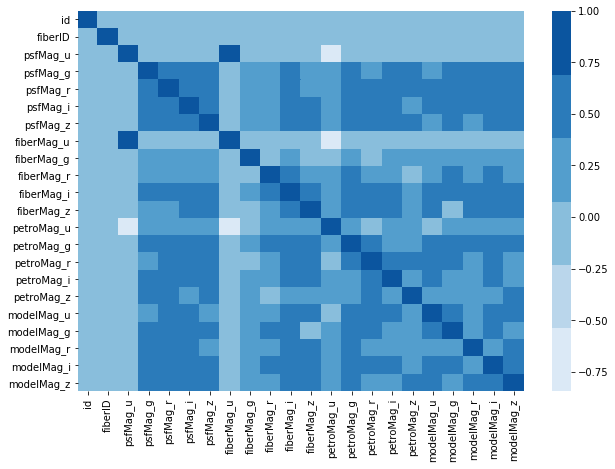

In [42]:
correlation = train.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation, cmap=cmap)

In [9]:
correlation

,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,1.000000,-0.000324,-0.001495,0.003652,-0.000154,0.000830,0.002073,-0.001432,-0.001708,-0.000471,0.001204,0.001797,0.001265,0.003260,-0.002406,0.000851,0.000094,-0.001717,0.000224,0.004030,-0.000993,0.002448
fiberID,-0.000324,1.000000,0.002673,0.003424,0.001901,0.004731,0.004108,0.002785,0.000951,0.004014,0.004143,0.004074,-0.000519,0.003111,0.002913,0.004261,0.001998,0.002441,0.003299,0.003050,0.005851,0.004217
psfMag_u,-0.001495,0.002673,1.000000,0.007163,0.008022,0.008373,0.007613,0.999612,0.001737,0.005493,0.007417,0.005179,-0.844577,0.006210,0.007035,0.005979,0.006911,0.005475,0.005218,0.006855,0.006553,0.009054
psfMag_g,0.003652,0.003424,0.007163,1.000000,0.656575,0.675570,0.529464,0.018975,0.147544,0.246507,0.479143,0.376652,0.132693,0.611664,0.139764,0.489554,0.458087,0.211310,0.485867,0.637270,0.424497,0.624421
psfMag_r,-0.000154,0.001901,0.008022,0.656575,1.000000,0.537715,0.451904,0.013608,0.120586,0.350773,0.498966,0.378253,0.118255,0.535407,0.487657,0.449181,0.677228,0.450860,0.550238,0.516004,0.590266,0.538881
psfMag_i,0.000830,0.004731,0.008373,0.675570,0.537715,1.000000,0.648709,0.018252,0.134389,0.352580,0.505415,0.385155,0.110858,0.682430,0.471127,0.523036,0.363586,0.557699,0.452765,0.523340,0.581413,0.640439
psfMag_z,0.002073,0.004108,0.007613,0.529464,0.451904,0.648709,1.000000,0.018465,0.121613,0.302411,0.557741,0.535643,0.141354,0.586643,0.552653,0.657507,0.419934,0.311835,0.448141,0.347738,0.658930,0.628597
fiberMag_u,-0.001432,0.002785,0.999612,0.018975,0.013608,0.018252,0.018465,1.000000,0.003690,0.002805,0.016168,0.013710,-0.841471,0.017214,0.012957,0.015468,0.007720,0.013842,0.014747,0.020647,0.007937,0.018597
fiberMag_g,-0.001708,0.000951,0.001737,0.147544,0.120586,0.134389,0.121613,0.003690,1.000000,0.063919,0.119069,0.062515,0.028254,0.109501,0.066799,0.109731,0.099121,0.101207,0.112340,0.090383,0.099054,0.139623
fiberMag_r,-0.000471,0.004014,0.005493,0.246507,0.350773,0.352580,0.302411,0.002805,0.063919,1.000000,0.492312,0.340019,0.086974,0.426770,0.171021,0.225000,0.012828,0.333907,0.411668,0.273085,0.485412,0.330141


In [10]:
from collections import Counter
def detect_outliers(df, n, features): 
  outlier_indices = [] 
  for col in features:
    if col == 'type' or col == 'id':
      continue; 
    Q1 = np.percentile(df[col], 25) 
    Q3 = np.percentile(df[col], 75) 
    IQR = Q3 - Q1 

    outlier_step =  IQR 
    outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index 
    outlier_indices.extend(outlier_list_col) 

  outlier_indices = Counter(outlier_indices) 
  multiple_outliers = list(k for k, v in outlier_indices.items() if v > n) 
  print()
  return multiple_outliers 

features = total.columns
print(features)
dup = detect_outliers(total, 2, features)

print(len(dup))

filter(lambda a: a < 199991, dup)
print(len(dup))

Index(['id', 'fiberID', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i',
       'fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i',
       'petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i',
       'modelMag_z'],
      dtype='object')

18080
18080


In [0]:
for i in dup:
  if i >= 199990:
    print(i)

In [0]:
train1 = train.drop(dup)

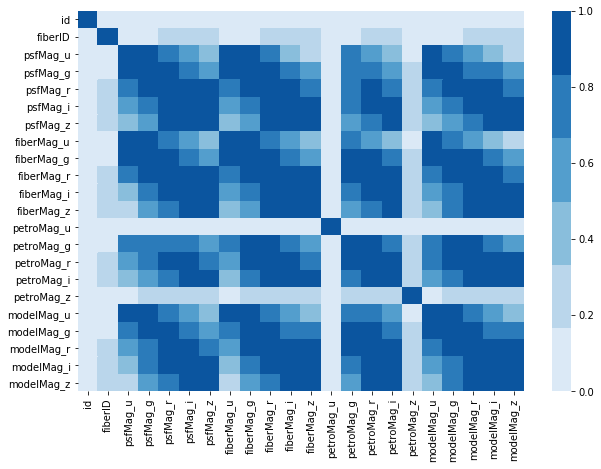

In [14]:
correlation = train1.corr()
cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(correlation, cmap=cmap)

Outlier을 iqr 로 제거하고 나면 상관계수가 높아진 것을 볼 수 있다.
따라서 iqr 로 outlier 제거하는 과정을 건너뛰어본다.

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199991 entries, 0 to 199990
Data columns (total 23 columns):
id            199991 non-null int64
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
dtypes: float64(20),

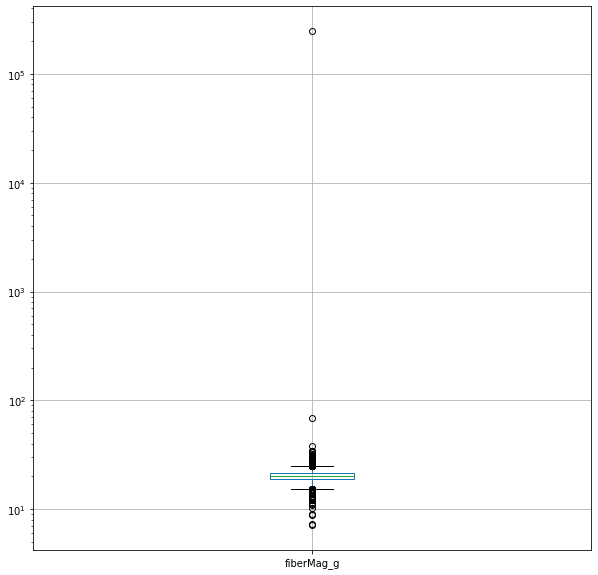

In [44]:
f, ax = plt.subplots(figsize=(10,10))
ax.set_yscale("log")
boxplot = train.boxplot(column=['fiberMag_g'])
#plt.yticks(np.arange())

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import minmax_scale
#Scaler = StandardScaler()
#Scaler = MinMaxScaler()
Scaler = RobustScaler()

train[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']] = Scaler.fit_transform(train[['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i','psfMag_z', 'fiberMag_u', 'fiberMag_g', 'fiberMag_r', 'fiberMag_i','fiberMag_z', 'petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i','petroMag_z', 'modelMag_u', 'modelMag_g', 'modelMag_r', 'modelMag_i','modelMag_z']])

train.describe()


,id,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199991.00000,199991.000000,1.999910e+05,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000,199991.000000
mean,99995.00000,360.830152,-1.101405e+01,-0.501757,-0.426875,-0.430119,-0.385753,-4.254757,-0.401270,-0.197623,-0.414132,-0.280996,0.576956,-0.391779,-0.235505,-0.339109,-0.158306,-0.108502,-0.347611,-0.322179,-0.317387,-0.292800
std,57732.57318,225.305890,4.735859e+03,63.460845,51.523847,50.141424,50.334979,1740.457793,301.757024,35.811076,50.407287,57.720840,309.635232,53.408824,32.656257,49.087170,47.517284,44.852679,56.033705,44.890206,43.856816,42.933395
min,0.00000,1.000000,-2.117686e+06,-16349.718284,-11025.633723,-11430.307546,-10128.169886,-777922.640616,-86953.228929,-8678.376258,-8331.690627,-10496.236121,-9602.675556,-8987.601877,-8049.096093,-13627.267755,-10019.792185,-9629.641601,-12792.288916,-12215.163188,-13034.361729,-8372.079298
25%,49997.50000,174.000000,-4.859831e-01,-0.491220,-0.569806,-0.557312,-0.482572,-0.462507,-0.469672,-0.545649,-0.529346,-0.437201,-0.438899,-0.509477,-0.571917,-0.553445,-0.456181,-0.418320,-0.509847,-0.576179,-0.556332,-0.448080
50%,99995.00000,349.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,149992.50000,526.000000,5.140169e-01,0.508780,0.430194,0.442688,0.517428,0.537493,0.530328,0.454351,0.470654,0.562799,0.561101,0.490523,0.428083,0.446555,0.543819,0.581680,0.490153,0.423821,0.443668,0.551920
max,199990.00000,1000.000000,7.477763e+03,1436.877418,1227.486735,2070.702426,3988.683494,2022.873156,99903.183936,4798.099741,3311.821085,7257.612376,117171.588549,4193.177873,2345.421031,3285.313297,5789.517830,5306.022788,3659.576249,4093.793967,1351.929407,2377.314296


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199991 entries, 0 to 199990
Data columns (total 23 columns):
id            199991 non-null int64
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
dtypes: float64(20),

In [0]:
# TRAIN 데이터의 TYPE을 SAMPLE_SUBMISSION에 대응하는 가변수 형태로 변환시킵니다.
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199991 entries, 0 to 199990
Data columns (total 24 columns):
id            199991 non-null int64
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
type_num      199991

Text(0.5, 1.0, 'type Values in the Training Set - train()')

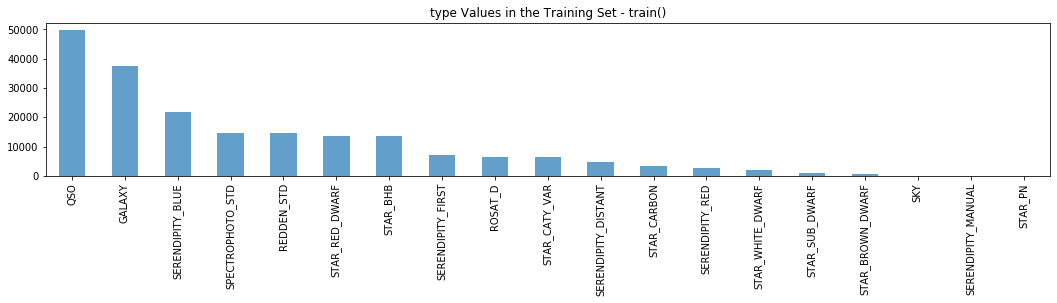

In [49]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=0.1)

plt.subplot2grid((3,3), (0,0), colspan=3)
train['type'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train()')

In [50]:
train['type'].value_counts()

QSO                    49680
GALAXY                 37347
SERENDIPITY_BLUE       21760
SPECTROPHOTO_STD       14630
REDDEN_STD             14618
STAR_RED_DWARF         13750
STAR_BHB               13500
SERENDIPITY_FIRST       7132
ROSAT_D                 6580
STAR_CATY_VAR           6506
SERENDIPITY_DISTANT     4654
STAR_CARBON             3257
SERENDIPITY_RED         2562
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

Class 간 차이가 많이 나므로, Undersampling 수행.
5천개 이상인것을 5천개만 Sampling 해서 수행.

In [51]:

print(sorted(Counter(train['type_num']).items()))
type0 = train[train['type_num']==1]
type1 = train[train['type_num']==4]
type2 = train[train['type_num']==5]
type3 = train[train['type_num']==6]
type4 = train[train['type_num']==8]
type5 = train[train['type_num']==10]
type6 = train[train['type_num']==11]
type7 = train[train['type_num']==13]
type8 = train[train['type_num']==15]
type9 = train[train['type_num']==18]
type10 = train[train['type_num']==0]
type11 = train[train['type_num']==2]
type12 = train[train['type_num']==3]
type13 = train[train['type_num']==7]
type14 = train[train['type_num']==9]
type15 = train[train['type_num']==12]
type16 = train[train['type_num']==14]
type17 = train[train['type_num']==16]
type18 = train[train['type_num']==17]
unsam_train0 = type0.sample(5000)
unsam_train1 = type1.sample(5000)
unsam_train2 = type2.sample(5000)
unsam_train3 = type3.sample(5000)
unsam_train4 = type4.sample(5000)
unsam_train5 = type5.sample(5000)
unsam_train6 = type6.sample(5000)
unsam_train7 = type7.sample(5000)
unsam_train8 = type8.sample(5000)
unsam_train9 = type9.sample(5000)
unsam_train = pd.concat([unsam_train0, unsam_train1, unsam_train2, unsam_train3, unsam_train4, unsam_train5, unsam_train6, unsam_train7, unsam_train8, unsam_train9, type10, type11, type12, type13, type14, type15, type16, type17, type18],axis=0)
print(sorted(Counter(unsam_train['type_num']).items()))


[(0, 2160), (1, 6506), (2, 500), (3, 2562), (4, 14618), (5, 13500), (6, 37347), (7, 4654), (8, 49680), (9, 127), (10, 13750), (11, 6580), (12, 13), (13, 7132), (14, 3257), (15, 14630), (16, 1154), (17, 61), (18, 21760)]
[(0, 2160), (1, 5000), (2, 500), (3, 2562), (4, 5000), (5, 5000), (6, 5000), (7, 4654), (8, 5000), (9, 127), (10, 5000), (11, 5000), (12, 13), (13, 5000), (14, 3257), (15, 5000), (16, 1154), (17, 61), (18, 5000)]


Text(0.5, 1.0, 'type Values in the Training Set - train()')

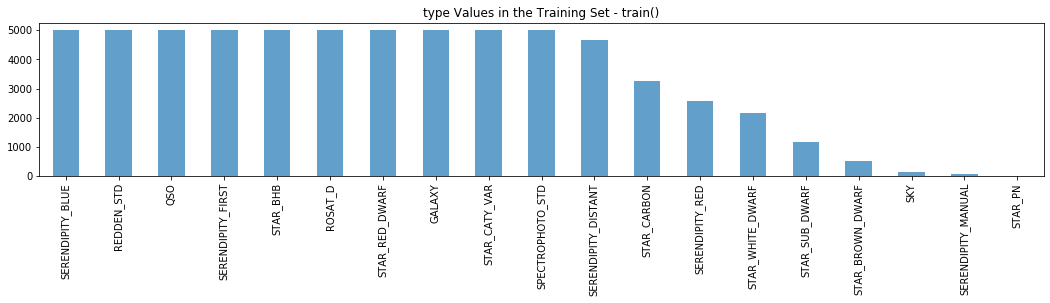

In [52]:
fig = plt.figure(figsize=(18,9))
plt.subplots_adjust(hspace=0.1)

plt.subplot2grid((3,3), (0,0), colspan=3)
unsam_train['type'].value_counts()[:100].plot(kind='bar', alpha=0.7)
plt.title('type Values in the Training Set - train()')

In [0]:
X_train = train.drop(columns=['type', 'type_num'])
y_train = train['type_num']

In [54]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10009 entries, 199991 to 209999
Data columns (total 19 columns):
STAR_WHITE_DWARF       10009 non-null float64
STAR_CATY_VAR          10009 non-null float64
STAR_BROWN_DWARF       10009 non-null float64
SERENDIPITY_RED        10009 non-null float64
REDDEN_STD             10009 non-null float64
STAR_BHB               10009 non-null float64
GALAXY                 10009 non-null float64
SERENDIPITY_DISTANT    10009 non-null float64
QSO                    10009 non-null float64
SKY                    10009 non-null float64
STAR_RED_DWARF         10009 non-null float64
ROSAT_D                10009 non-null float64
STAR_PN                10009 non-null float64
SERENDIPITY_FIRST      10009 non-null float64
STAR_CARBON            10009 non-null float64
SPECTROPHOTO_STD       10009 non-null float64
STAR_SUB_DWARF         10009 non-null float64
SERENDIPITY_MANUAL     10009 non-null float64
SERENDIPITY_BLUE       10009 non-null float64
dtypes: flo

In [55]:
sample_submission.describe()

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0,10009.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
AdaBoost = AdaBoostClassifier(n_estimators=200, random_state=1)


# for clf_name, clf in zip(['AdaBoost', 'GradientBoost'],[AdaBoost, GradientBoost]):
#     scores = cross_val_score(estimator= clf,
#                             X=X_train,
#                             y=y_train,
#                             cv=4,
#                             scoring='neg_log_loss')
#     print("ACCURACY : %f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), clf_name))

In [57]:
AdaBoost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 200,
 'random_state': 1}

In [0]:
# from sklearn import metrics
# from sklearn.model_selection import train_test_split, GridSearchCV
# acc = metrics.make_scorer(metrics.accuracy_score)
# params={'learning_rate' : [0.01, 0.1],
#        'n_estimators' : [200, 500],
#        'base_estimator__max_depth' : [10,50]}
# clf = GridSearchCV(AdaBoost, param_grid = params, scoring = acc, cv=10, n_jobs=-1)
# clf.fit(X_train, y_train)
# print('BestScore:{}'.format(clf.best_score_))
# print('BestParam:{}'.format(clf.best_params_))

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split
RANDOM_SEED = 0
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, \
                                                  test_size=0.2, random_state=RANDOM_SEED, stratify = y_train)
AdaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=100,
                              algorithm="SAMME.R", learning_rate=0.5)

AdaBoost.fit(X_train, y_train)
Ada_pred = AdaBoost.predict_proba(test)
submission = pd.DataFrame(data=Ada_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('AdaboostClassifierwoOutlier.csv', index=True)
submission.describe()

,STAR_WHITE_DWARF,STAR_CATY_VAR,STAR_BROWN_DWARF,SERENDIPITY_RED,REDDEN_STD,STAR_BHB,GALAXY,SERENDIPITY_DISTANT,QSO,SKY,STAR_RED_DWARF,ROSAT_D,STAR_PN,SERENDIPITY_FIRST,STAR_CARBON,SPECTROPHOTO_STD,STAR_SUB_DWARF,SERENDIPITY_MANUAL,SERENDIPITY_BLUE
count,10009.000000,10009.000000,10009.000000,10009.000000,1.000900e+04,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,1.000900e+04,10009.000000,10009.000000,1.000900e+04,1.000900e+04,10009.000000,10009.000000
mean,0.000450,0.000006,0.010044,0.017770,4.376005e-10,0.000059,0.103208,0.007293,0.189359,0.321387,0.144112,0.159587,1.800668e-05,0.021799,0.002459,8.275772e-12,1.507390e-07,0.015204,0.007244
std,0.000095,0.000002,0.003191,0.002471,3.207255e-10,0.000016,0.010739,0.000673,0.031146,0.053595,0.010484,0.020030,4.322380e-06,0.003431,0.000697,1.199979e-12,3.856384e-08,0.004264,0.001316
min,0.000088,0.000003,0.000112,0.001041,2.572208e-10,0.000009,0.075641,0.004384,0.144470,0.000738,0.019248,0.127015,3.267560e-07,0.013611,0.000857,4.530157e-12,1.032956e-08,0.001518,0.003431
25%,0.000425,0.000004,0.008649,0.017247,4.255143e-10,0.000049,0.094068,0.007443,0.164134,0.310818,0.144158,0.140331,1.652755e-05,0.018868,0.002119,7.565928e-12,1.366485e-07,0.013228,0.007153
50%,0.000439,0.000004,0.009078,0.017722,4.640396e-10,0.000050,0.103095,0.007443,0.178557,0.327546,0.145044,0.155568,1.804669e-05,0.021328,0.002277,7.927189e-12,1.431732e-07,0.017687,0.007153
75%,0.000462,0.000006,0.009844,0.018855,4.861967e-10,0.000060,0.106158,0.007510,0.189132,0.374517,0.149453,0.168297,1.967455e-05,0.021340,0.002347,8.740836e-12,1.436216e-07,0.018539,0.007206
max,0.001902,0.000047,0.054640,0.142401,3.058566e-08,0.000450,0.191907,0.026680,0.477553,0.374517,0.402762,0.334090,1.267408e-04,0.077987,0.005838,5.526999e-11,6.778078e-07,0.038329,0.037215
